# k-Nearest Neighbours

## Exercise 1

Ternary classification

Given three points R=(-1, 0), G=(0, 1), B=(1, 0), colored in red, green and blue, respectively. Using `matplotlib`, create a plot that shows the decision surface of the 1-NN classifier using these three points as a dataset with three different classes, similart to the way `plot_decision_surface_knn` works for two classes (the function is located in `tools/plots.py`).

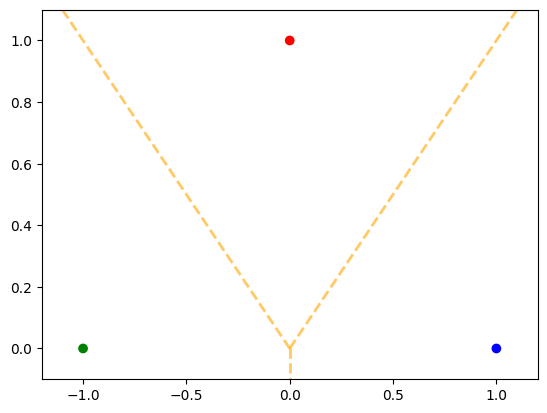

In [19]:
import pandas as pd
d = pd.DataFrame({
    'X1': [-1, 0, 1],
    'X2': [0, 1, 0],
    'Y': [0, 1, 2]
})
X, Y = d[['X1', 'X2']], d['Y']

import matplotlib.pyplot as plt
c = []
for l in Y:
    if l == 0:
        c.append('green')
    elif l == 1:
        c.append('red')
    else:
        c.append('blue')

# Plot the data using Voronoi diagram
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(X)
fig = voronoi_plot_2d(vor, show_vertices=False, show_points=False, line_colors='orange', line_width=2, line_alpha=0.6, point_size=2)
plt.scatter(X['X1'], X['X2'], c=c)
plt.show()






## Exercise 2
Accuracy comparison with ID3

Considering the dataset below:
1. plot the points using the `scatter` function from `matplotlib`;
1. compare the training accuracy of 1-NN and ID3;
1. compare the CVLOO accuracy of 1-NN and ID3.

In [27]:
import pandas as pd
d = pd.DataFrame({
    'X1': [1, 2, 4, 5, 7],
    'X2': [2, 1, 5, 4, 3],
    'Y': [0, 0, 0, 1, 1]
})
X, Y = d[['X1', 'X2']], d['Y']

## Exercise 3
1-NN decision boundary

Using the code below, change the value of the `boundary` variable such that it correctly represents the decision boundary for 1-NN between the two classes of points. You can specify hard-coded values (you don't have to calculate them in Python).

[[10.         10.        ]
 [10.54545455  9.90909091]
 [10.33333333 10.        ]
 [17.         -3.        ]
 [ 7.          7.        ]
 [-3.         23.        ]
 [ 6.19230769  6.73076923]
 [ 4.5         8.        ]
 [ 4.72222222  3.05555556]
 [-2.5         4.5       ]]


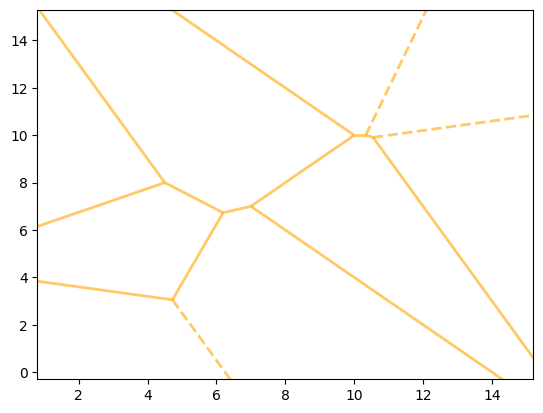

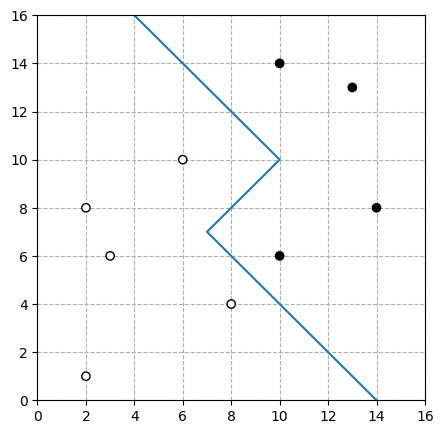

In [41]:
import pandas as pd
from scipy.spatial import Voronoi, voronoi_plot_2d
d = pd.DataFrame({
    'X1': [2, 2, 3, 6, 8, 10, 10, 13, 14],
    'X2': [1, 8, 6, 10, 4, 6, 14, 13, 8],
    'Y': [0, 0, 0, 0, 0, 1, 1, 1, 1]
})
X, Y = d[['X1', 'X2']], d['Y']


# Correct this line
vor = Voronoi(X)
print(vor.vertices)
fig = voronoi_plot_2d(vor, show_vertices=False, show_points=False, line_colors='orange', line_width=2, line_alpha=0.6, point_size=2)
plt.show()
boundary=pd.DataFrame([(-3,23),(10,10),(7,7),(17,-3)], columns=['x','y'])


import matplotlib.pyplot as plt
c= ['white' if l == 0 else 'black' for l in Y]
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_axisbelow(True)
plt.scatter(X['X1'], X['X2'], color=c, edgecolor='k')
plt.xlim(0, 16)
plt.ylim(0, 16)
plt.plot(boundary['x'],boundary['y'])
plt.grid(linestyle='dashed')
plt.show()

## Exercise 4
Finding optimum value for $k$

For the dataset below:
1. plot the points using `pyplot.scatter`;
1. plot a line chart using `pyplot.plot` that shows the training error and the CVLOO error of k-NN for all values of $k$ between 1 and 15. 
1. What is the best value of $k$ in this case?

In [50]:
from scipy.stats import norm
import pandas as pd
import numpy as np
x_red = norm.rvs(0, 1, 100, random_state=1)
y_red = norm.rvs(0, 1, 100, random_state=2)
x_green = norm.rvs(1, 1, 100, random_state=3)
y_green = norm.rvs(1, 1, 100, random_state=4)
d = pd.DataFrame({
    'X1': np.concatenate([x_red,x_green]),
    'X2': np.concatenate([y_red,y_green]),
    'Y': [1]*100+[0]*100
})
X, Y = d[['X1', 'X2']], d['Y']

## Exercise 5
Large number of attributes

Considering the following dataset (attributes in the `X` variable and labels in the `Y` variable):
1. Measure the CVLOO accuracy for 5-NN;
1. Measure the CVLOO accuracy for ID3;
1. What is the reason for the difference?
1. What can be done to improve the accuracy of 5-NN? If something can be done, what is the new accuracy?

In [101]:
from scipy.stats import norm
import pandas as pd
from statistics import median

def new_var(n):
    return norm.rvs(0, 1, 100, random_state=n)

d = {f'X{i}':new_var(i) for i in range(10)}
m = median(X['X2'])

X = pd.DataFrame(d)
Y = pd.Series([0 if i < m else 1 for i in X['X2']])

## Exercise 6
Comparison between k-NN and ID3

Create a simple two-dimensional dataset on which the CVLOO accuracy is at least 75% for 3-NN, but less than 50% for ID3 (with entropy and no prunning). Plot the dataset using `matplotlib.pyplot` and calculate the CVLOO accuracy for 3-NN and ID3 for confirmation.